In [1]:
#import libraries

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [2]:
#Download data by BeautifulSoup

url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(url).text
soup = BeautifulSoup(res, 'lxml')
table = soup.find('table', {'class':'wikitable sortable'})

In [3]:
#Creat a datafram for toronto refer to link
table_rows = table.find_all('tr')
data = []

for row in table_rows:
    td = []
    for t in row.find_all('td'):
        td.append(t.text.strip())
    data.append(td)
df = pd.DataFrame(data, columns = ['PostalCode', 'Borough', 'Neighborhood'])
df.head()

,PostalCode,Borough,Neighborhood
0,None,None,None
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


In [4]:
#Clean the data

df = df.dropna()
empty = 'Not assigned'
df = df[(df.PostalCode != empty) & (df.Borough != empty) & (df.Neighborhood != empty)]
df.head()

,PostalCode,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M5A,Downtown Toronto,Regent Park
7,M6A,North York,Lawrence Heights


In [5]:
df_final = df.groupby(['PostalCode', 'Borough'], sort = False).agg(','.join).reset_index()
df_final.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M9A,Etobicoke,Islington Avenue


In [6]:
#To transform the coordinate file into the dataframe.

csv_file = 'http://cocl.us/Geospatial_data'
coordinates = pd.read_csv(csv_file)
coordinates.columns = ['PostalCode', 'Latitude', 'Longitude']
coordinates.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [7]:
#Merge coordinate in dataframe

df_merge = pd.merge(df_final, coordinates[['PostalCode','Latitude', 'Longitude']], on='PostalCode')
df_merge.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
5,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
6,M3B,North York,Don Mills North,43.745906,-79.352188
7,M4B,East York,"Woodbine Gardens,Parkview Hill",43.706397,-79.309937
8,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
9,M6B,North York,Glencairn,43.709577,-79.445073


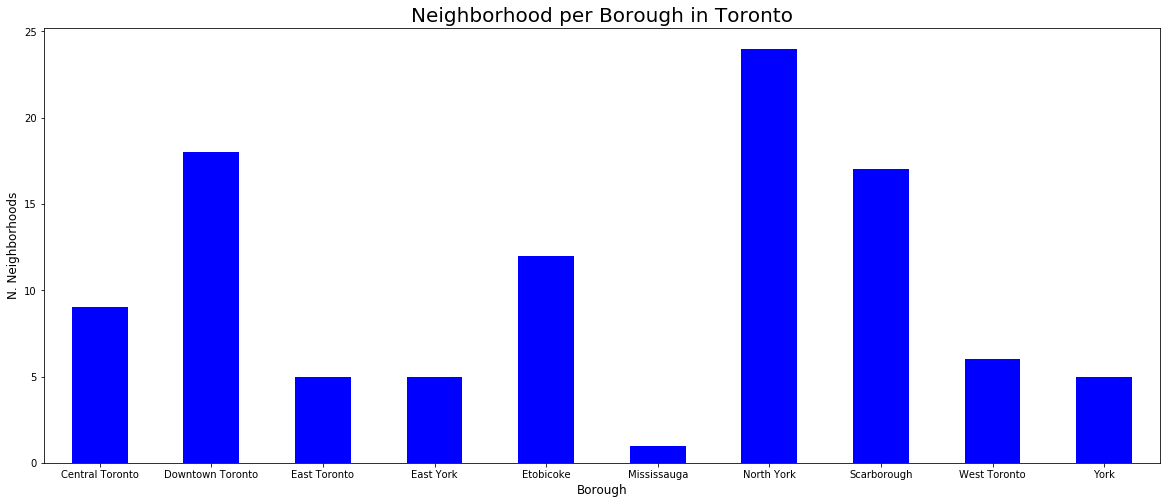

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

clr = "blue"
df_merge.groupby('Borough')['Neighborhood'].count().plot.bar(figsize = (20,8), color = clr)
plt.title('Neighborhood per Borough in Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('N. Neighborhoods', fontsize = 12)
plt.xticks(rotation = 'horizontal')
plt.show()

In the figure Neighborhood per Borough in Toronto, we can see that Mississauga has the least number of neighborhoods in all of ten buroughs.

Let's analyze how many Italian restaurants there are in each neighborhood.

In [9]:
# The code was removed by Watson Studio for sharing.

In [10]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)  

In [12]:
toronto_df = getNearbyVenues(names=df_merge['Borough'],
                                   latitudes=df_merge['Latitude'],
                                   longitudes=df_merge['Longitude']
                                  )

North York
North York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toronto
Scarborough
Ce

In [13]:
toronto_df_neigh = getNearbyVenues(names=df_merge['Neighborhood'],
                                   latitudes=df_merge['Latitude'],
                                   longitudes=df_merge['Longitude']
                                  )
toronto_df_neigh.columns = ['Neighborhood',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

Parkwoods
Victoria Village
Harbourfront,Regent Park
Lawrence Heights,Lawrence Manor
Islington Avenue
Rouge,Malvern
Don Mills North
Woodbine Gardens,Parkview Hill
Ryerson,Garden District
Glencairn
Cloverdale,Islington,Martin Grove,Princess Gardens,West Deane Park
Highland Creek,Rouge Hill,Port Union
Flemingdon Park,Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe
Guildwood,Morningside,West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor,Downsview North,Wilson Heights
Thorncliffe Park
Adelaide,King,Richmond
Dovercourt Village,Dufferin
Scarborough Village
Fairview,Henry Farm,Oriole
Northwood Park,York University
East Toronto
Harbourfront East,Toronto Islands,Union Station
Little Portugal,Trinity
East Birchmount Park,Ionview,Kennedy Park
Bayview Village
CFB Toronto,Downsview East
The Danforth West,Riverdale
Design Exchange,Toron

In [14]:
toronto_df.head()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,North York,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,North York,43.753259,-79.329656,GreenWin pool,43.756232,-79.333842,Pool
3,North York,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,North York,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [15]:
toronto_df_neigh.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,GreenWin pool,43.756232,-79.333842,Pool
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [21]:
for i in range(len(toronto_df)):
    a="Restaurant"
    if a in toronto_df.loc[i,'Venue Category']:
        print(toronto_df.loc[i,:])

Borough                              North York
Neighborhood Latitude                   43.7259
Neighborhood Longitude                 -79.3156
Venue                                 Portugril
Venue Latitude                          43.7258
Venue Longitude                        -79.3128
Venue Category            Portuguese Restaurant
Name: 5, dtype: object
Borough                          North York
Neighborhood Latitude               43.7259
Neighborhood Longitude             -79.3156
Venue                              The Frig
Venue Latitude                      43.7271
Venue Longitude                    -79.3174
Venue Category            French Restaurant
Name: 6, dtype: object
Borough                   Downtown Toronto
Neighborhood Latitude              43.6543
Neighborhood Longitude            -79.3606
Venue                       Impact Kitchen
Venue Latitude                     43.6564
Venue Longitude                    -79.357
Venue Category                  Restaurant
Name: 12,

In [25]:
b1=[]
b2=[]
b3=[]
b4=[]
b5=[]
b6=[]
b7=[]
 
for i in range(len(toronto_df)):
    a="Restaurant"
    if a in toronto_df.loc[i,'Venue Category']:
        a1 = toronto_df.loc[i,'Borough']
        a2 = toronto_df.loc[i,'Neighborhood Latitude']
        a3 = toronto_df.loc[i,'Neighborhood Longitude']
        a4 = toronto_df.loc[i,'Venue']
        a5 = toronto_df.loc[i,'Venue Latitude']
        a6 = toronto_df.loc[i,'Venue Longitude']
        a7 = toronto_df.loc[i,'Venue Category']
        
        b1.append(a1)
        b2.append(a2)
        b3.append(a3)
        b4.append(a4)
        b5.append(a5)
        b6.append(a6)
        b7.append(a7)
        
toronto_df_bo=pd.DataFrame(columns=['Borough',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'])
 
toronto_df_bo['Borough']=b1
toronto_df_bo['Neighborhood Latitude']=b2
toronto_df_bo['Neighborhood Longitude']=b3
toronto_df_bo[ 'Venue']=b4
toronto_df_bo['Venue Latitude']=b5
toronto_df_bo['Venue Longitude']=b6
toronto_df_bo['Venue Category']=b7

toronto_df_bo.head()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
1,North York,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
2,Downtown Toronto,43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,Downtown Toronto,43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant
4,Downtown Toronto,43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant


In [26]:
for i in range(len(toronto_df_neigh)):
    a="Restaurant"
    if a in toronto_df_neigh.loc[i,'Venue Category']:
        print(toronto_df_neigh.loc[i,:])

Neighborhood                   Victoria Village
Neighborhood Latitude                   43.7259
Neighborhood Longitude                 -79.3156
Venue                                 Portugril
Venue Latitude                          43.7258
Venue Longitude                        -79.3128
Venue Category            Portuguese Restaurant
Name: 5, dtype: object
Neighborhood               Victoria Village
Neighborhood Latitude               43.7259
Neighborhood Longitude             -79.3156
Venue                              The Frig
Venue Latitude                      43.7271
Venue Longitude                    -79.3174
Venue Category            French Restaurant
Name: 6, dtype: object
Neighborhood              Harbourfront,Regent Park
Neighborhood Latitude                      43.6543
Neighborhood Longitude                    -79.3606
Venue                               Impact Kitchen
Venue Latitude                             43.6564
Venue Longitude                            -79.357
Venu

In [27]:
b1=[]
b2=[]
b3=[]
b4=[]
b5=[]
b6=[]
b7=[]
 
for i in range(len(toronto_df_neigh)):
    a="Restaurant"
    if a in toronto_df_neigh.loc[i,'Venue Category']:
        a1 = toronto_df_neigh.loc[i,'Neighborhood']
        a2 = toronto_df_neigh.loc[i,'Neighborhood Latitude']
        a3 = toronto_df_neigh.loc[i,'Neighborhood Longitude']
        a4 = toronto_df_neigh.loc[i,'Venue']
        a5 = toronto_df_neigh.loc[i,'Venue Latitude']
        a6 = toronto_df_neigh.loc[i,'Venue Longitude']
        a7 = toronto_df_neigh.loc[i,'Venue Category']
        
        b1.append(a1)
        b2.append(a2)
        b3.append(a3)
        b4.append(a4)
        b5.append(a5)
        b6.append(a6)
        b7.append(a7)
        
toronto_df_neighborhood=pd.DataFrame(columns=['Neighborhood',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'])
 
toronto_df_neighborhood['Neighborhood']=b1
toronto_df_neighborhood['Neighborhood Latitude']=b2
toronto_df_neighborhood['Neighborhood Longitude']=b3
toronto_df_neighborhood[ 'Venue']=b4
toronto_df_neighborhood['Venue Latitude']=b5
toronto_df_neighborhood['Venue Longitude']=b6
toronto_df_neighborhood['Venue Category']=b7

toronto_df_neighborhood.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
1,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
2,"Harbourfront,Regent Park",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,"Harbourfront,Regent Park",43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant
4,"Harbourfront,Regent Park",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant


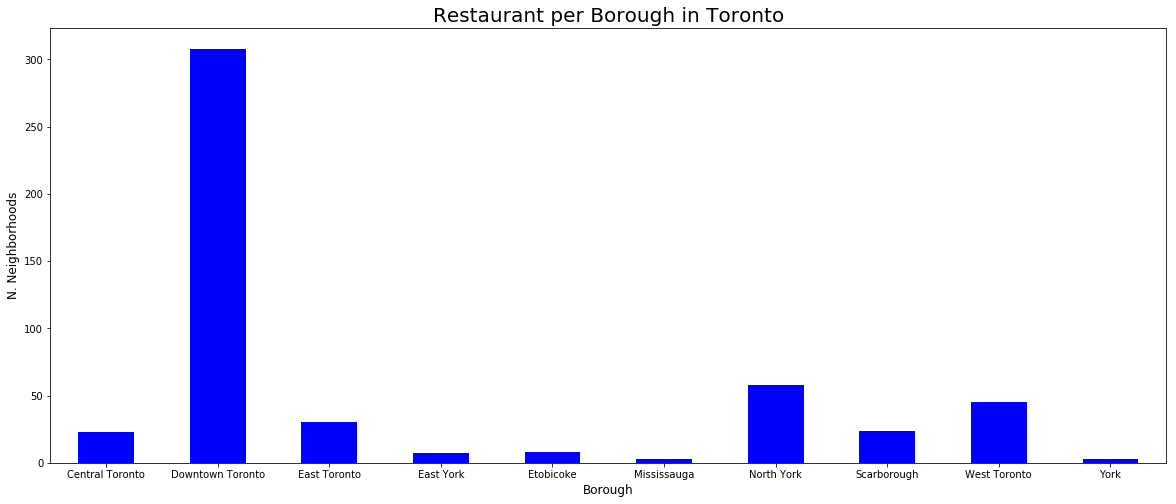

In [28]:
clr = "blue"
toronto_df_bo.groupby('Borough')['Venue'].count().plot.bar(figsize = (20,8), color = clr)
plt.title('Restaurant per Borough in Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('N. Neighborhoods', fontsize = 12)
plt.xticks(rotation = 'horizontal')
plt.show()

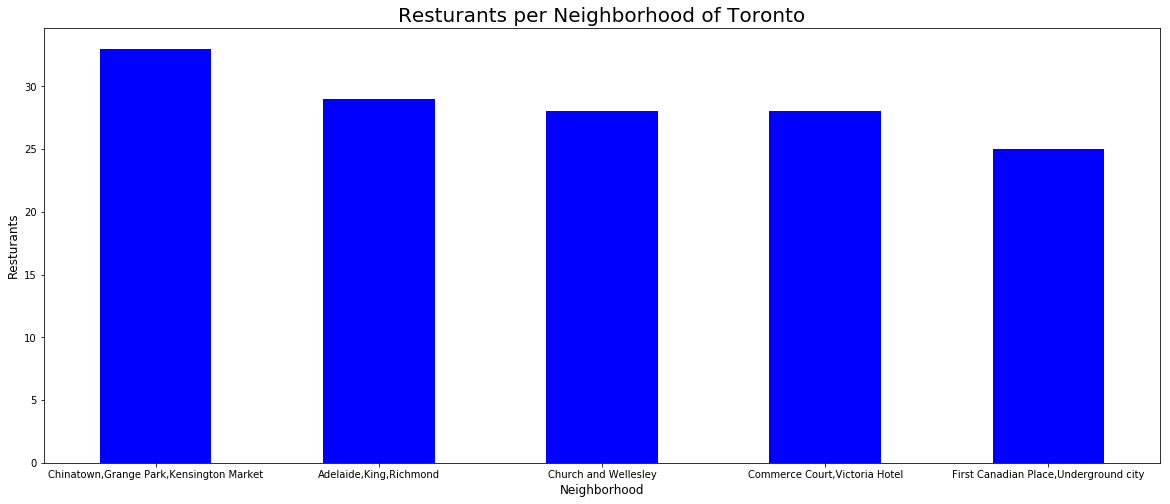

In [29]:
N_Neigh = 5 # top number for graphing all the same past 5
toronto_df_neighborhood.groupby('Neighborhood')['Venue'].count().nlargest(N_Neigh).plot.bar(figsize=(20,8), color=clr)
plt.title('Resturants per Neighborhood of Toronto', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 12)
plt.ylabel('Resturants', fontsize=12)
plt.xticks(rotation = 'horizontal')
plt.show()

In [56]:
italian_neigh = italian_restaurants_neigh[italian_restaurants_neigh['Neighborhood'] == 'St. James Town']
italian_neigh

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
227,St. James Town,43.651494,-79.375418,Terroni,43.650927,-79.375602,Italian Restaurant
246,St. James Town,43.651494,-79.375418,Carisma,43.649617,-79.375434,Italian Restaurant
249,St. James Town,43.651494,-79.375418,La Bettola Di Terroni,43.651993,-79.378056,Italian Restaurant
318,St. James Town,43.651494,-79.375418,Vagabondo Ristorante & Lounge,43.648222,-79.375300,Italian Restaurant
322,St. James Town,43.651494,-79.375418,Mercatto,43.650243,-79.380820,Italian Restaurant


In [40]:
toronto_rest = pd.merge(toronto_df_bo, toronto_df_neighborhood[['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                                                                   'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']], 
                   on = ('Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'))
toronto_rest.head()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Neighborhood
0,North York,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,Victoria Village
1,North York,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant,Victoria Village
2,Downtown Toronto,43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant,"Harbourfront,Regent Park"
3,Downtown Toronto,43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant,"Harbourfront,Regent Park"
4,Downtown Toronto,43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant,"Harbourfront,Regent Park"


In [36]:
!conda install -c conda-forge folium=0.5.0 --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [37]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [38]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [43]:
map_restaurant = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighborhood in zip(toronto_rest['Venue Latitude'], toronto_rest['Venue Longitude'],toronto_rest['Borough'], toronto_rest['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_restaurant)  
    
map_restaurant

In [44]:
toronto_onehot = pd.get_dummies(toronto_rest[['Venue Category']], prefix = "", prefix_sep = "")
toronto_onehot ['Neighborhood'] = toronto_rest['Neighborhood']
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

In [45]:
num_top_venues = 10

for neigh in toronto_grouped['Neighborhood']:
  print("----" + neigh + "----")
  temp = toronto_grouped[toronto_grouped['Neighborhood'] == neigh].T.reset_index()
  temp.columns = ['venue', 'freq']
  temp = temp.iloc[1:]
  temp['freq'] = temp['freq'].astype(float)
  temp = temp.round({'freq': 2})
  print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
  print('\n')

----Adelaide,King,Richmond----
                           venue  freq
0                Thai Restaurant  0.14
1            American Restaurant  0.14
2               Asian Restaurant  0.10
3                     Restaurant  0.10
4               Sushi Restaurant  0.07
5  Vegetarian / Vegan Restaurant  0.07
6             Seafood Restaurant  0.03
7        New American Restaurant  0.03
8               Greek Restaurant  0.03
9      Latin American Restaurant  0.03


----Agincourt----
                       venue  freq
0         Chinese Restaurant   1.0
1          Afghan Restaurant   0.0
2          Polish Restaurant   0.0
3          Jewish Restaurant   0.0
4          Korean Restaurant   0.0
5  Latin American Restaurant   0.0
6           Malay Restaurant   0.0
7   Mediterranean Restaurant   0.0
8         Mexican Restaurant   0.0
9  Middle Eastern Restaurant   0.0


----Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown----
                      

In [46]:
# Define a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
  row_categories = row.iloc[1:]
  row_categories_sorted = row_categories.sort_values(ascending = False)

  return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
# Creat a new dataframe for venues sorted
import numpy as np
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# Creat columns according to the number of top venues
columns = ['Neighborhood']
for i in np.arange(num_top_venues):
  try:
    columns.append('{}{} Most Common Venue'.format(i+1, indicators[i]))
  except:
    columns.append('{}th most Common Venue'.format(i+1))

# Creat a new dataframe
neighborhood_venues_sorted = pd.DataFrame(columns = columns)
neighborhood_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for i in np.arange(toronto_grouped.shape[0]):
  neighborhood_venues_sorted.iloc[i,1:] = return_most_common_venues(toronto_grouped.iloc[i, :], num_top_venues)

neighborhood_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most Common Venue,5th most Common Venue,6th most Common Venue,7th most Common Venue,8th most Common Venue,9th most Common Venue,10th most Common Venue
0,"Adelaide,King,Richmond",American Restaurant,Thai Restaurant,Asian Restaurant,Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Colombian Restaurant,Mediterranean Restaurant,Japanese Restaurant
1,Agincourt,Chinese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
2,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Fast Food Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
3,"Bathurst Manor,Downsview North,Wilson Heights",Sushi Restaurant,Fast Food Restaurant,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
4,Bayview Village,Japanese Restaurant,Chinese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
5,"Bedford Park,Lawrence Manor East",Italian Restaurant,Indian Restaurant,Sushi Restaurant,Fast Food Restaurant,Comfort Food Restaurant,Restaurant,Greek Restaurant,American Restaurant,Thai Restaurant,Brazilian Restaurant
6,Berczy Park,Seafood Restaurant,Italian Restaurant,Greek Restaurant,Comfort Food Restaurant,Restaurant,French Restaurant,Indian Restaurant,Belgian Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
7,"Brockton,Exhibition Place,Parkdale Village",Italian Restaurant,Caribbean Restaurant,Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
8,Business Reply Mail Processing Centre 969 Eastern,Fast Food Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
9,"Cabbagetown,St. James Town",Restaurant,Italian Restaurant,Indian Restaurant,Thai Restaurant,Taiwanese Restaurant,Japanese Restaurant,Caribbean Restaurant,Chinese Restaurant,Fast Food Restaurant,Empanada Restaurant


### Cluster Neighborhood

In [48]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

toronto_clustering = toronto_grouped.drop('Neighborhood',1)

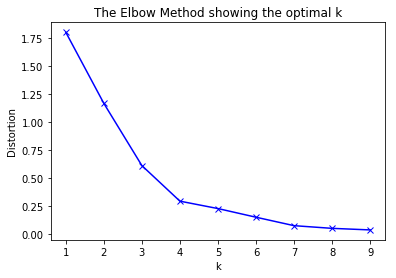

In [49]:
K = range(1, 10)
distortions = []
for k in K:
  kmeans = KMeans(init = 'k-means++', n_clusters=k, n_init = 12, random_state=0)
  kmeans.fit(toronto_clustering.values.reshape(-1, 1))
  distortions.append(sum(np.min(cdist(toronto_clustering.values.reshape(-1, 1),
                                        kmeans.cluster_centers_, 'euclidean'), axis=1)) / toronto_clustering.shape [0])

import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Refer to the elbow method, the optimal value of the number of cluster should be defined as 5.

In [50]:
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(toronto_clustering)
kmeans.labels_

array([4, 0, 2, 4, 0, 4, 4, 4, 2, 4, 2, 4, 3, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 4, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 1,
       4, 4, 4, 4, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 4, 0, 4, 4, 2],
      dtype=int32)

Right now, we need to creat a new dataframe that includeds the cluster for each neighborhood.

In [51]:
# Add clusterin labels
neighborhood_venues_sorted.insert(0, 'Cluster', kmeans.labels_)
toronto_merge = df_merge

# Merge toronto_grouped with df_merge
toronto_merge = toronto_merge.join(neighborhood_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

toronto_merge.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most Common Venue,5th most Common Venue,6th most Common Venue,7th most Common Venue,8th most Common Venue,9th most Common Venue,10th most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M4A,North York,Victoria Village,43.725882,-79.315572,4.0,French Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636,4.0,Restaurant,Mexican Restaurant,Greek Restaurant,Italian Restaurant,French Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763,1.0,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
4,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We observe that there is NaN for some neighborhood and one more cluster label columns. Drop them.

In [52]:
toronto_merge = toronto_merge.dropna()

In [53]:
toronto_merge['Cluster'] = toronto_merge.Cluster.astype(int)

In [58]:
# Import libraries
import matplotlib.cm as cm
import matplotlib.colors as colors

# Creat the folium map

map_toronto = folium.Map(location = [latitude_toronto, longitude_toronto], zoom_start=10)

# Set color for clusters
x = np.arange(num_clusters)
ys = [i + x +(i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Set the marker for the map
markers_colors = []
for lat, lng, nei, cluster in zip(toronto_merge['Latitude'], toronto_merge['Longitude'], toronto_merge['Neighborhood'], toronto_merge['Cluster']):
  label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
  folium.CircleMarker([lat, lng],
                      radius=5,
                      popup=label,
                      color=rainbow[cluster-1],
                      fill=True,
                      fill_color=rainbow[cluster-1],
                      fill_opacity=0.7).add_to(map_toronto)

map_toronto

### Examine Clusters

#### For Cluster 1

In [59]:
toronto_merge.loc[toronto_merge['Cluster'] == 0, toronto_merge.columns[[1] + list(range(5, toronto_merge.shape[1]))]]

,Borough,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most Common Venue,5th most Common Venue,6th most Common Venue,7th most Common Venue,8th most Common Venue,9th most Common Venue,10th most Common Venue
38,North York,0,Japanese Restaurant,Chinese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
69,Etobicoke,0,Chinese Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
77,Scarborough,0,Chinese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
89,Scarborough,0,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant


#### For Cluster 2

In [60]:
toronto_merge.loc[toronto_merge['Cluster'] == 1, toronto_merge.columns[[1] + list(range(5, toronto_merge.shape[1]))]]

,Borough,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most Common Venue,5th most Common Venue,6th most Common Venue,7th most Common Venue,8th most Common Venue,9th most Common Venue,10th most Common Venue
3,North York,1,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
28,East York,1,Indian Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
64,Scarborough,1,Indian Restaurant,Latin American Restaurant,Chinese Restaurant,Vietnamese Restaurant,Tapas Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant


#### For Cluster 3

In [61]:
toronto_merge.loc[toronto_merge['Cluster'] == 2, toronto_merge.columns[[1] + list(range(5, toronto_merge.shape[1]))]]

,Borough,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most Common Venue,5th most Common Venue,6th most Common Venue,7th most Common Venue,8th most Common Venue,9th most Common Venue,10th most Common Venue
5,Scarborough,2,Fast Food Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
7,East York,2,Fast Food Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
20,York,2,Fast Food Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
43,Scarborough,2,Fast Food Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
88,Etobicoke,2,Fast Food Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
99,East Toronto,2,Fast Food Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
101,Etobicoke,2,Fast Food Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant


#### For Cluster 4

In [62]:
toronto_merge.loc[toronto_merge['Cluster'] == 3, toronto_merge.columns[[1] + list(range(5, toronto_merge.shape[1]))]]

,Borough,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most Common Venue,5th most Common Venue,6th most Common Venue,7th most Common Venue,8th most Common Venue,9th most Common Venue,10th most Common Venue
6,North York,3,Japanese Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
25,Scarborough,3,Hakka Restaurant,Thai Restaurant,Caribbean Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
33,North York,3,Caribbean Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
62,York,3,Caribbean Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hakka Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant


#### For Cluster 5

In [63]:
toronto_merge.loc[toronto_merge['Cluster'] == 4, toronto_merge.columns[[1] + list(range(5, toronto_merge.shape[1]))]]

,Borough,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most Common Venue,5th most Common Venue,6th most Common Venue,7th most Common Venue,8th most Common Venue,9th most Common Venue,10th most Common Venue
1,North York,4,French Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
2,Downtown Toronto,4,Restaurant,Mexican Restaurant,Greek Restaurant,Italian Restaurant,French Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant
8,Downtown Toronto,4,Fast Food Restaurant,Ramen Restaurant,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Mexican Restaurant,Chinese Restaurant
9,North York,4,Japanese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
12,North York,4,Asian Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Gluten-free Restaurant
14,Downtown Toronto,4,Restaurant,Italian Restaurant,American Restaurant,Japanese Restaurant,Seafood Restaurant,Middle Eastern Restaurant,German Restaurant,New American Restaurant,Comfort Food Restaurant,French Restaurant
17,Scarborough,4,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
19,Downtown Toronto,4,Seafood Restaurant,Italian Restaurant,Greek Restaurant,Comfort Food Restaurant,Restaurant,French Restaurant,Indian Restaurant,Belgian Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
21,Scarborough,4,Korean Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
22,East York,4,Sushi Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
